# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Шаг 1. Откройте файл с данными и изучите общую информацию**
Путь к файлу:
/datasets/games.csv


**Шаг 2. Подготовьте данные**
 - Замените названия столбцов (приведите к нижнему регистру);
 - Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
 - Обработайте пропуски при необходимости:
 - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
 - Опишите причины, которые могли привести к пропускам;
 - Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
 - Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.
 
 
**Шаг 3. Проведите исследовательский анализ данных**
 - Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
 - Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
 - Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
 - Не учитывайте в работе данные за предыдущие годы.
 - Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
 - Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.
 - Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
 - Соотнесите выводы с продажами игр на других платформах.
 - Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
 
 
**Шаг 4. Составьте портрет пользователя каждого региона**
 - Определите для пользователя каждого региона (NA, EU, JP):
  - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
  - Самые популярные жанры (топ-5). Поясните разницу.
  - Влияет ли рейтинг ESRB на продажи в отдельном регионе?


**Шаг 5. Проверьте гипотезы**
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.
 - Задайте самостоятельно пороговое значение alpha.
 - Поясните:
 - Как вы сформулировали нулевую и альтернативную гипотезы;
 - Какой критерий применили для проверки гипотез и почему.
 
 
**Шаг 6. Напишите общий вывод**

**Описание данных**
 - Name — название игры
 - Platform — платформа
 - Year_of_Release — год выпуска
 - Genre — жанр игры
 - NA_sales — продажи в Северной Америке (миллионы долларов)
 - EU_sales — продажи в Европе (миллионы долларов)
 - JP_sales — продажи в Японии (миллионы долларов)
 - Other_sales — продажи в других странах (миллионы долларов)
 - Critic_Score — оценка критиков (максимум 100)
 - User_Score — оценка пользователей (максимум 10)
 - Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math 
import matplotlib.pyplot as plt
from scipy import stats as st
pd.set_option('display.max_columns', 100)
%matplotlib inline

Откроем файл и посмотрим на общую информацию о данных

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Теперь изучим подробнее информацию о столбцах датафрейма, посчитаем кол-во прпоусков, изучим статистические показатели данных.

In [3]:

for name in data.columns:
    print('############')
    print(name)
    print(data[name].describe())
    print('NaN amount: {}'.format(data[name].isna().sum()))
    print('NaN in %: {:.2f}%'.format(data[name].isna().sum()/len(data[name])*100))
print(data['Rating'].unique())

############
Name
count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: Name, dtype: object
NaN amount: 2
NaN in %: 0.01%
############
Platform
count     16715
unique       31
top         PS2
freq       2161
Name: Platform, dtype: object
NaN amount: 0
NaN in %: 0.00%
############
Year_of_Release
count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: Year_of_Release, dtype: float64
NaN amount: 269
NaN in %: 1.61%
############
Genre
count      16713
unique        12
top       Action
freq        3369
Name: Genre, dtype: object
NaN amount: 2
NaN in %: 0.01%
############
NA_sales
count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: NA_sa

### Вывод

 - Name содержит 2 пропущенных значения. 11559 уникальных наименований.
 - Platform - нет пропущенных значений. 31 уникальное.
 - Year_of_release - необходимо перевести из float в int. 269 пропущенных значений.
 - Genre - содержит 2 пропущенных значения. 12 уникальных.
 - NA_sales, EU_sales, JP_sales, Other_sales нет пропущенных, но есть нулевые необходимо разобраться в чем причина их появления(действительно лио означает малые продажи или отсутствие данных)
 - Critic_Score - большое кол-во пропусков. 51%. Необходимо заполнить
 - User_Score - большое кол-во пропусков. 40% Необходимо заполнить. Также присутсвует значение tbd 2424 раза. Разобраться что это. Привести к float.
 - Rating 40% пропущенных значений. Необходимо ли их заполнять?

## Шаг 2. Подготовьте данные
 - Замените названия столбцов (приведите к нижнему регистру);
 - Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
 - Обработайте пропуски при необходимости:
 - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
 - Опишите причины, которые могли привести к пропускам;
 - Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
 - Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

###### Замена названия столбцов

In [4]:
data.columns = data.columns.str.lower()
print(data.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


###### Заполнение пропущенных значений в year_of_release и приведение к типу int

Заполнение значений в year_of_release производится путем поиска медианного значения года выхода игр по платформам. 

In [5]:
def fill_year_of_release(row):
    year_of_release = 0
    temp_year = row['year_of_release']
    platform = row['platform']
    if math.isnan(temp_year):
        year_of_release = round(data[data['platform'] == row['platform']]['year_of_release'].median())
    else:
        year_of_release = row['year_of_release']
    return year_of_release
data['year_of_release'] = data.apply(fill_year_of_release, axis = 1)

In [6]:
data['year_of_release'] = data['year_of_release'].fillna(0)
try:
    data['year_of_release'] = data['year_of_release'].astype('int')
except:
    pass
display(data['year_of_release'].describe())

count    16715.000000
mean      2006.473347
std          5.897579
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

### Комментарий

Значения year_of_release заполнялись медианными значениями для каждой из платформ. Т.к. платформа известна для каждой игры. year_of_release приведены в формат int.

###### Исследование пропусков в названии игр.

In [7]:
display(data.query('name.isna()'))
data.dropna(subset = ['name'], inplace = True)
display(data.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


None

### Комментарий
Так как таких игр всего 2, и выпущены они в 1993 году, то удаление строк игр без названия не внесет ошибку в конечный результат.

**Добавление столбца  total_sales с суммарными продажами**

In [8]:
data['total_sales'] = data['eu_sales'] + data['na_sales'] + data['jp_sales'] + data['other_sales']
display(data.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


###### Исследование пропусков  в Critic_Score и User_Score . 

в столбцах **Critic_Score** и **User_Score** помимо пропущенных значений содержатся 'tbd', которые тоже следует интерпретировать, как NaN

In [9]:
print(len(data[data['critic_score'].isna()]['critic_score']))
print(len(data[data['user_score'].isna()]['critic_score']))

8576
6699


In [10]:
print(len(data[data['user_score'] == 'tbd']))
data['user_score'] = data['user_score'].replace('tbd', None)
data['user_score'] = data['user_score'].astype('float')

2424


In [11]:
print(len(data[(data['critic_score'].isna()) & (data['user_score'].isna())]))
print(len(data[data['user_score'].isna()]['critic_score']))
print(len(data[data['critic_score'].isna()]['critic_score']))
print(abs(len(data[data['critic_score'].isna()]) - len(data[data['user_score'].isna()])))

7348
7953
8576
623


### Комментарий
Значения tbd в user_score означают to be determined(то есть либо прошло мало времени с момента выхода игры или же кол-во голосов не соответсвует некому порогому значению) для дальней работы с данными они были заменены пропусками. Пропусков в данных содержится большое кол-во. Но насколько целесообразно их заполнять неясно и как это сделать правильным образом. На мой взгляд, стоимость игры имеет важную связь с ее рейтингом, но т.к. именно на такой вопрос предстоит ответить на вопрос в ходе выполнения задания, то такой способ заполнения не представляется корректным. Любые другие способы(Например: связав рейтинг с жанром каждой игры и платформы, на которой игра выпущена) заполнения этих данных без использования информации по продажам не представляется корректным, поэтому было решено оставить эти данные незаполненными.

###### Исследование пропусков  и значений в Rating

In [12]:
print(len(data[data['rating'].isna()]))
print(data['rating'].unique())
print(data['rating'].value_counts())

6764
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64


In [13]:
print(len(data[data['rating'] == 'RP']))

3



 - K-A это устаревшее название E - для всех, следовательно необходимо заменить на K-A на E 
 - M - 17+
 - T - 13+
 - E10+ - 10+
 - AO - 18+
 - EC - 3+
 - RP - рейтинг ожидается, таких всего 3 штуки, для упрощения будут приняты за nan
Также присутствует большое число пропущенных значений, которые можно заполнить, используя связь жанра и возрастных ограничений.

Заменим 'K-A' на 'E', а 'RP' на None

In [14]:
data['rating'] = data['rating'].replace('K-A', 'E')
data['rating'] = data['rating'].replace('RP', None)
print(data['rating'].value_counts())

E       3994
T       2962
M       1563
E10+    1420
EC         8
AO         1
Name: rating, dtype: int64


На мой взгляд восстановить рейтинг игры можно используя наиболее распространенный рейтинг игр того же жанра.

In [15]:
def fill_rating(row):
    temp_genre = row['genre']
    temp_rating = row['rating']
    if pd.isnull(temp_rating):
        temp_rating = data[data['genre'] == temp_genre]['rating'].value_counts().idxmax()
    return temp_rating

In [16]:
data['rating'] = data.apply(fill_rating, axis = 1)
print(len(data[data['rating'].isna()]))

0


In [17]:
print(data['rating'].value_counts())

E       7797
T       5620
M       1867
E10+    1420
EC         8
AO         1
Name: rating, dtype: int64


### Вывод
Была произведена обработка данных, в тех столбцах, где это было целесообразно были заменены пропуски. Теперь данные готовы для последующего анализа.

## Шаг 3. Проведите исследовательский анализ данных¶
 - Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
 - Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
 - Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
 - Не учитывайте в работе данные за предыдущие годы.
 - Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
 - Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.
 - Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
 - Соотнесите выводы с продажами игр на других платформах.
 - Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

###### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Построим графики, чтобы оценить выпуск игр и выручки по годам

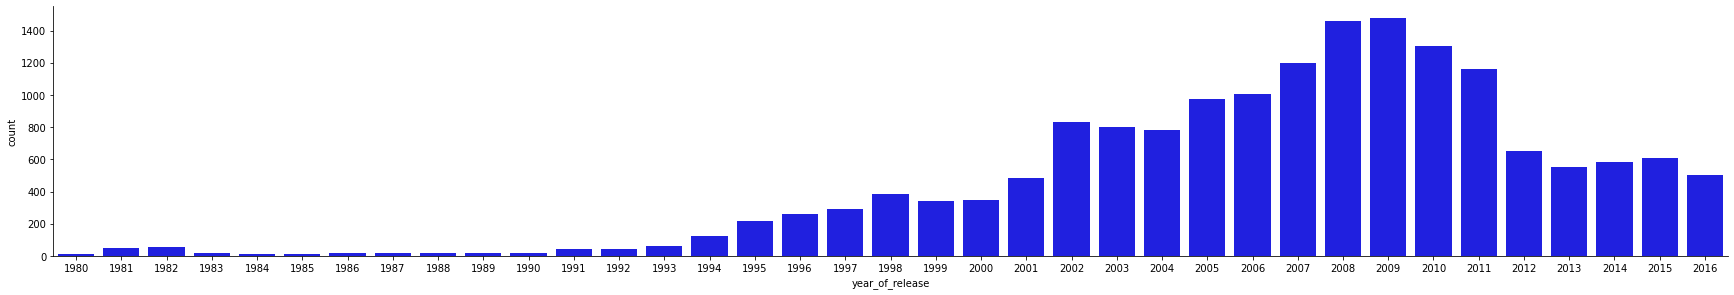

In [18]:
ax = sns.catplot(
    data=data,
    x='year_of_release',
    kind='count',
    height=4, 
    aspect=6,
    color='blue')

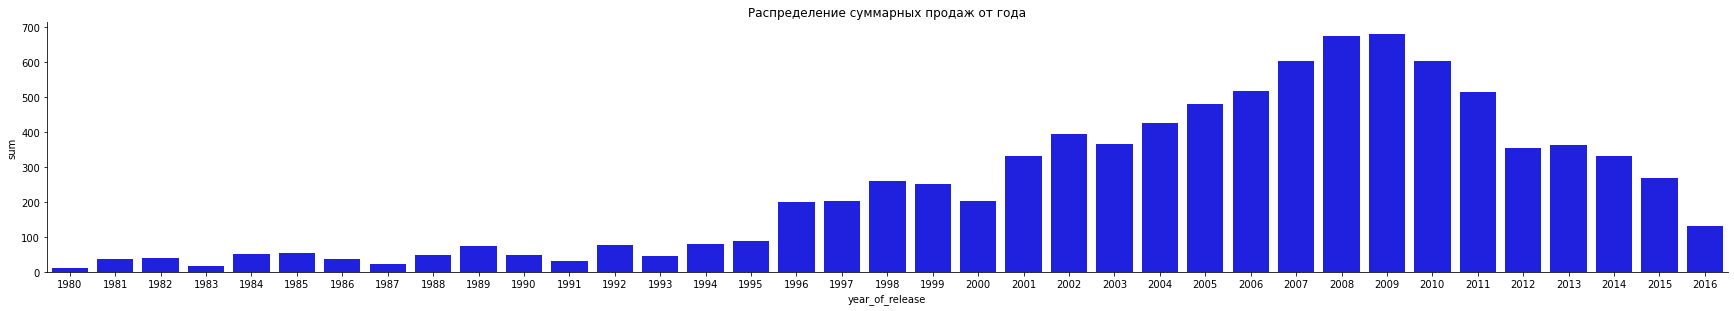

In [19]:
ax = sns.catplot(
    data=data.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = {'sum'}),
    kind='bar',
    x=data.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = {'sum'}).index,
    y=data.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = {'sum'})['sum'],
    height=4, 
    aspect=6,
    color='blue')
ax.set(title = 'Распределение суммарных продаж от года')
plt.show()

### Комментарий
Как видно из графика кол-во выпускаемых игр резко вырос в 2002 году. Максимальное кол-во игр было выпущено в 2009, затем был спад. Начиная с 2012 года кол-во выпускаемых игр несильно отличается друг от друга. График выручки имеет схожие тенденции. Но спад менее заметен, что возможно связано с увеличением стоимости игр.

###### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

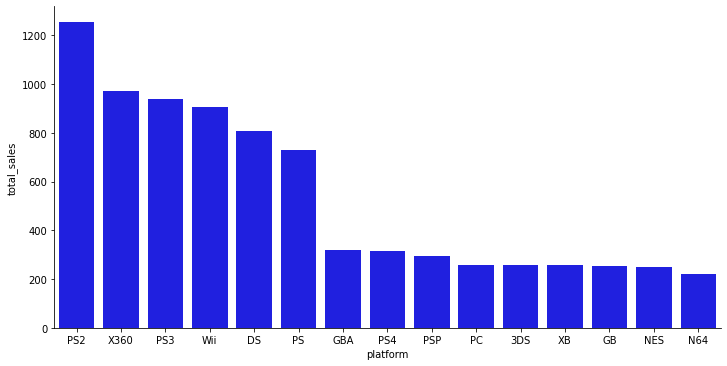

In [20]:
top_sales_platforms = data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False).head(15)

top_sales_platforms = top_sales_platforms.reset_index()



ax = sns.catplot(
    data=top_sales_platforms,
    x = 'platform',
    y = 'total_sales',
    kind = 'bar',
    aspect = 2,
color = 'blue')


###### Комментарий
В качестве популярных платформ были выбраны PS2, X360, PS3, Wii, DS, PS

In [21]:
display(top_sales_platforms['platform'].head(6))

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
Name: platform, dtype: object

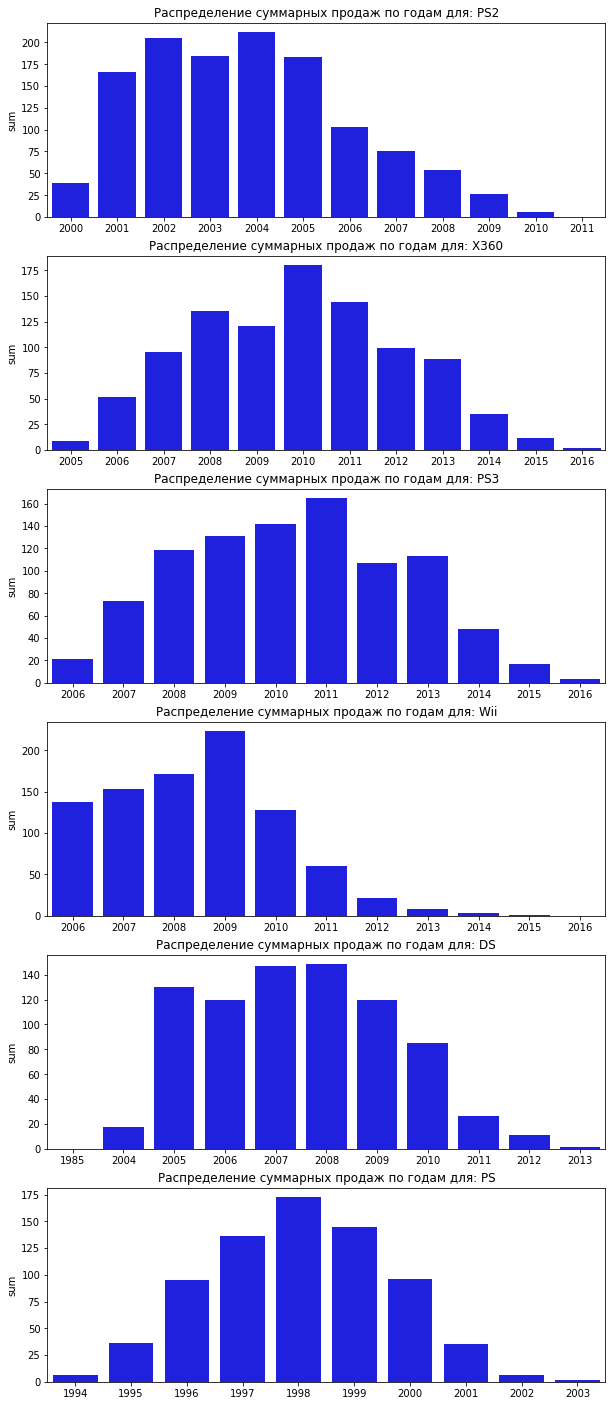

In [22]:
fig, axes = plt.subplots(6, 1, figsize=(10, 25))
i = 0
for temp_platform in top_sales_platforms['platform'].head(6):
    temp_platform_data = data.query('platform == @temp_platform')
    temp_platform_data = temp_platform_data.pivot_table(index = 'year_of_release', values = 'total_sales',
                                                       aggfunc = {sum})
    sns.barplot(
        ax = axes[i],
        x = temp_platform_data.index,
        y = temp_platform_data['sum'],
        color = 'blue'
    )
#     axes[i].set(ylim=(0, 3))
    axes[i].set(title = 'Распределение суммарных продаж по годам для: {}'.format(temp_platform))
    axes[i].set(xlabel = '')
    i+=1
plt.show()    

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
Name: platform, dtype: object

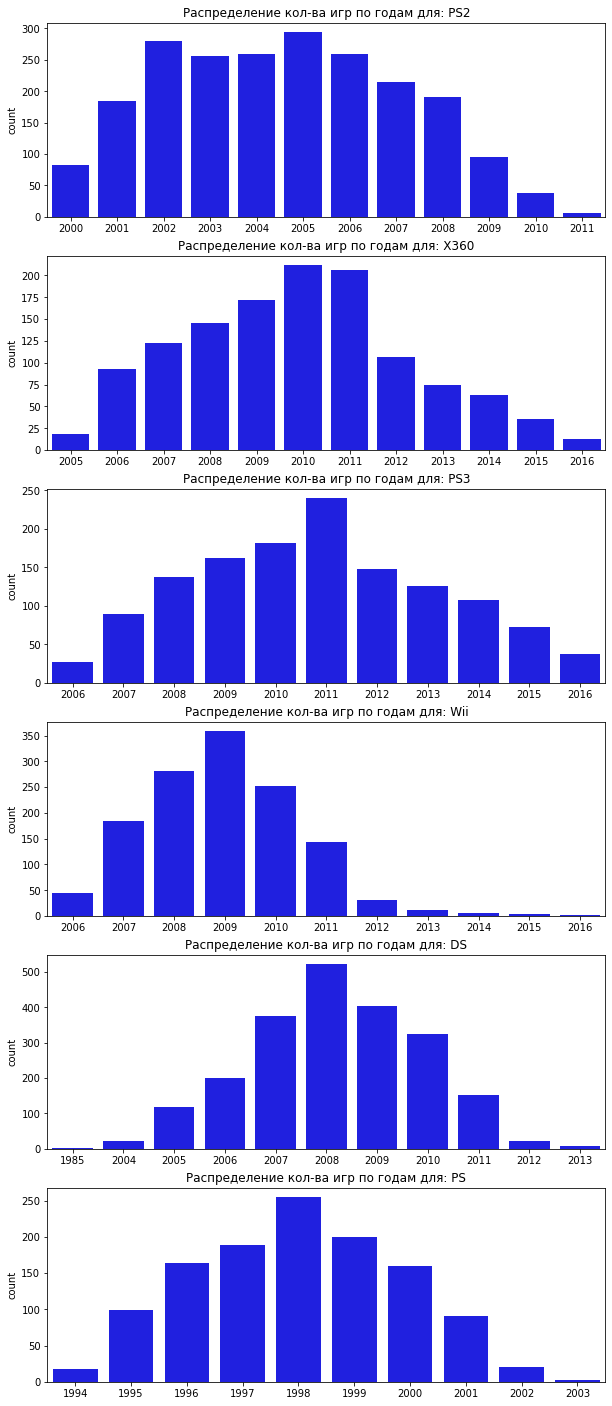

In [23]:
display(top_sales_platforms['platform'].head(6))
fig, axes = plt.subplots(6, 1, figsize=(10, 25))
i = 0

for temp_platform in top_sales_platforms['platform'].head(6):
    temp_platform_data = data.query('platform == @temp_platform')
    temp_platform_data = temp_platform_data.pivot_table(index = 'year_of_release', values = 'total_sales',
                                                       aggfunc = {'count'})
    sns.barplot(
        ax = axes[i], 
        x = temp_platform_data.index,
        y =  temp_platform_data['count'],
        color='blue')
    axes[i].set(title = 'Распределение кол-ва игр по годам для: {}'.format(temp_platform))
    axes[i].set(xlabel = '')
    i += 1
plt.show()

###### Комментарий
Для популярных платформ: PS2, X360, PS3, Wii, DS, PS были построены графики зав-ти суммарных продаж и кол-ва выпущенных игр от года. Полученные графики свидетельсвуют о том, что характерный срок "жизни" платформ может выбран равным 10 годам, пик кол-ва игр приходится в среднем на 5 лет. Для платформы DS присутствует выброс: 1985 год, что свидетельсвует об ошибке в начальном наборе данных.

###### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.


По результатам из предыдущего задания в среднем новые платформы остаются на плаву 10 лет, а пик их популярности приходится на 5 лет. К тому же как видно из графика зав-ти кол-ва выпущенных игр от года, начиная с 2012, кол-во игр держится на определенном уровне. Поэтому в качестве актуального периода будет выбран период с 2012 по 2016 года.

###### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Выберем платформы которые были выпущены с 2006 года и на которые выходили игры в 2015-2016 годах(это отсеет те платформы, которые были неуспешны и время жизни, которых менее 10 лет.)

In [24]:
platforms_after_2006 = data[(data['year_of_release'] >= 2006)].sort_values(by='year_of_release', ascending = False).pivot_table(index = 'platform', values = 'year_of_release', aggfunc = ['min','max'])
platforms_after_2006 = platforms_after_2006.reset_index()
platforms_after_2006.columns = ('platform','year_of_first_game','year_of_last_game')
display(platforms_after_2006[platforms_after_2006['year_of_last_game'] >= 2015])

,platform,year_of_first_game,year_of_last_game
0,3DS,2011,2016
5,PC,2006,2016
7,PS3,2006,2016
8,PS4,2013,2016
9,PSP,2006,2015
10,PSV,2011,2016
11,Wii,2006,2016
12,WiiU,2012,2016
13,X360,2006,2016
15,XOne,2013,2016


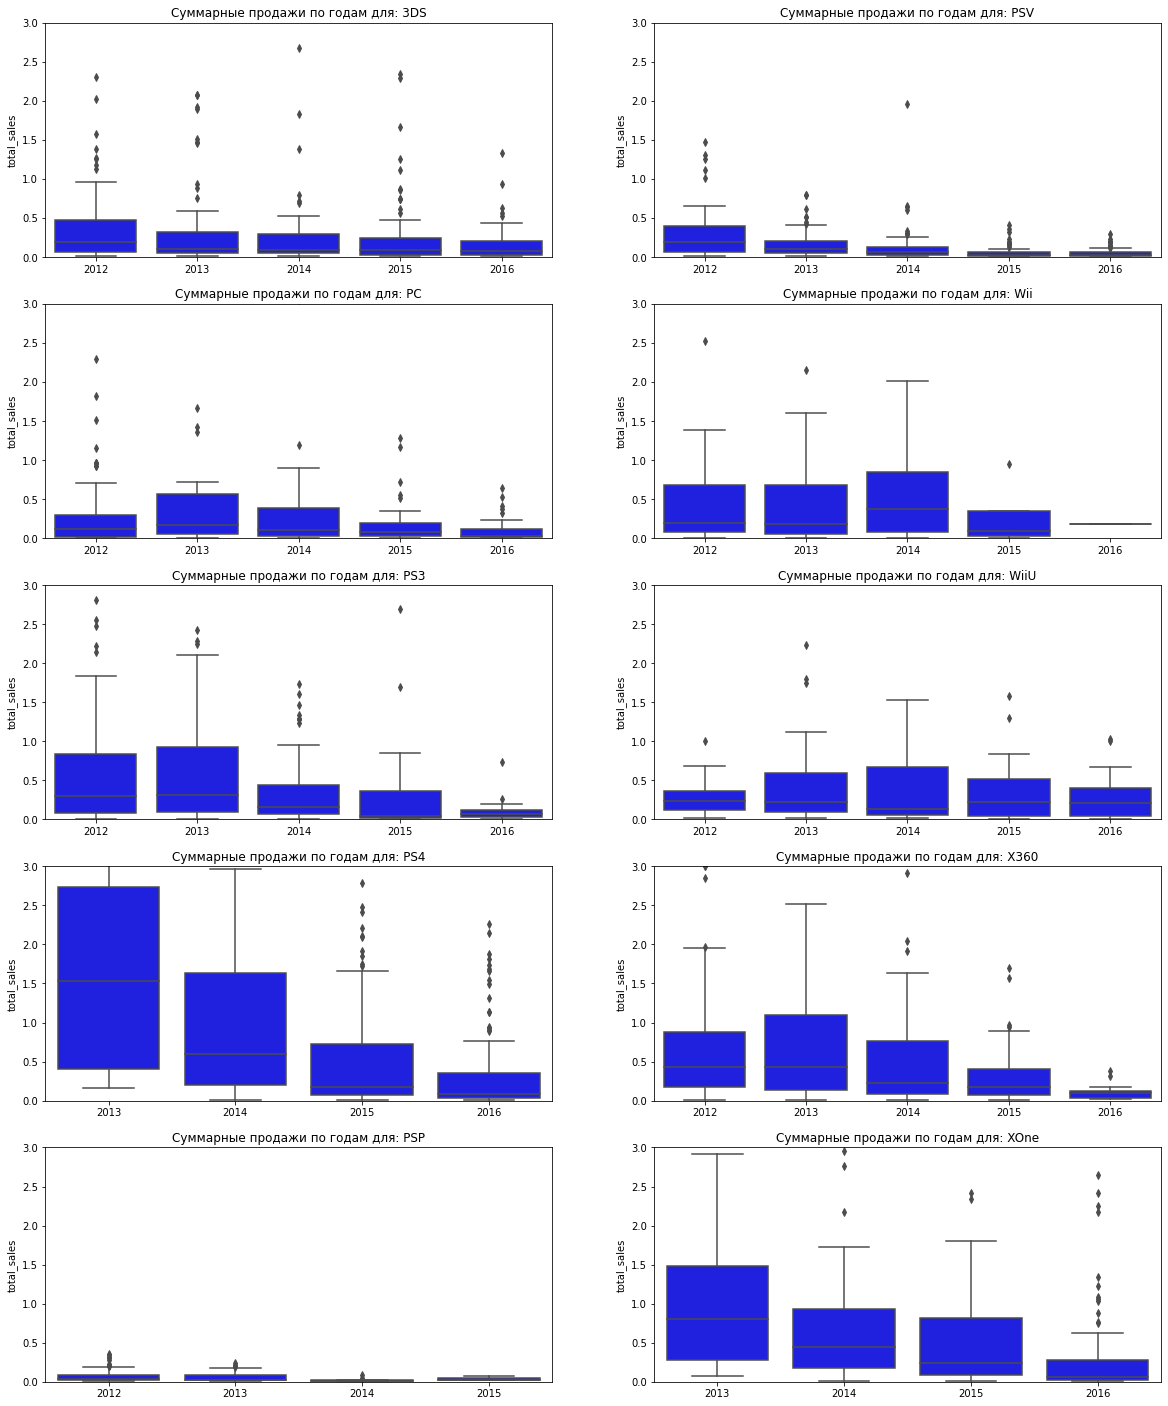

In [25]:
fig, axes = plt.subplots(5, 2, 
                         figsize=(20, 25))
i = 0

for temp_platform in platforms_after_2006[platforms_after_2006['year_of_last_game'] >= 2015]['platform']:
    index_1 = i % 5
    index_2 = i // 5
    temp_platform_data = data.query('(platform == @temp_platform) & (2012 <= year_of_release <= 2016)')
    sns.boxplot(
    ax = axes[index_1][index_2],
    x = temp_platform_data['year_of_release'],
    y = temp_platform_data['total_sales'],
        color='blue')
    axes[index_1][index_2].set(ylim=(0, 3))
    axes[index_1][index_2].set(title = 'Cуммарные продажи по годам для: {}'.format(temp_platform))
    axes[index_1][index_2].set(xlabel = '')
    i += 1
    
plt.show()

Представим данные для выбранных платформ и игр в виде графиков.

### Комментарий

   Для начала были выбраны платформы которые были выпущены с 2006 года и на которые выходили игры в 2015-2016 годах(это отсеет те платформы, которые были неуспешны и время жизни, которых менее 10 лет.) Для этих платформ были построены графики суммарных продаж в зависимости от года(2012-2016,т.к. интересен актуальный период). Для того, чтобы оценить успешность платформ необходимо рассмотреть продажи за актуальный период для каждой платформы. Из графиков хорошо видно, что выход в продажу нового поколения платформы уменьшает продажи игр для платформы предыдущей версии.(Например PS3 и PS4, Wii и WiiU). Хотя почти для всех платформ наблюдается снижение продаж, можно выделить те у которых уровень продаж находится в лучших значениях. Платформы, которые должны быть наиболее прибыльны в 2017 году: 3DS, PS4, WiiU, XOne.

###### Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.

In [26]:
good_data = data.query('(platform == "3DS") | (platform == "PS4") | (platform == "WiiU") | (platform == "XOne")')
good_data.reset_index(drop = True, inplace = True)
display(good_data.head(10))
print(len(good_data))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,M,14.63
1,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,T,14.60
2,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
3,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
4,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,T,11.68
5,Super Mario 3D Land,3DS,2011,Platform,4.89,3.00,2.14,0.78,90.0,8.4,E,10.81
6,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90
7,Animal Crossing: New Leaf,3DS,2012,Simulation,2.03,2.36,4.39,0.39,88.0,8.7,E,9.17
8,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
9,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,M,7.98


1306


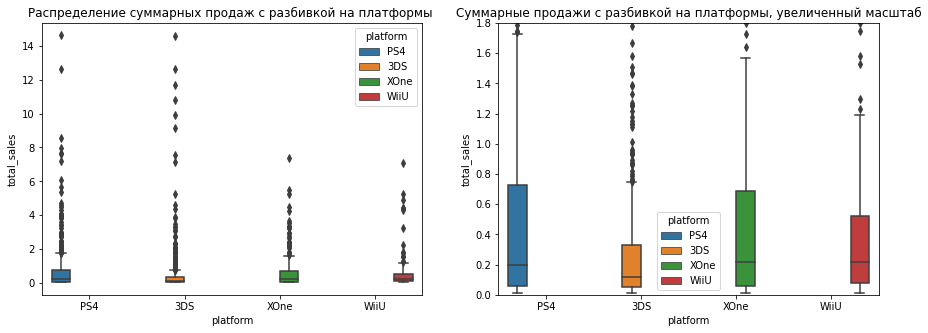

In [27]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))
sns.boxplot(
    ax = ax1,
    data=good_data,
    x = 'platform',
    y='total_sales',
    hue='platform')
# ax1.set(ylim=(0, 3))
ax1.set(title = 'Распределение суммарных продаж с разбивкой на платформы ')



sns.boxplot(
    ax = ax2,
    data=good_data,
    x = 'platform',
    y='total_sales',
    hue='platform')
ax2.set(ylim=(0, 1.8))
ax2.set(title = 'Суммарные продажи с разбивкой на платформы, увеличенный масштаб')
plt.show()


In [28]:
display(good_data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = ['mean','sum','median','count']))

,mean,sum,median,count
,total_sales,total_sales,total_sales,total_sales
platform,,,,
3DS,0.498077,259.00,0.12,520
PS4,0.801378,314.14,0.20,392
WiiU,0.559116,82.19,0.22,147
XOne,0.645020,159.32,0.22,247


###### Комментарий

Как видно из графика:
- PS4, WiiU, XOne имеют примерно равные медианные значения, у 3DS оно почти в два раза меньше.
- средние значения продаж игр PS4 существенно выше, чем у других платформ, засчет выбросов, которые наблюдаются на графиках
- Наибольшее кол-во игр на платформе 3DS - 520, далее PS4 и XOne 392 и 247, меньше всего игр на WiiU - 147.

###### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

В качестве платформы для рассмотрения будет взята PS4.

In [29]:
PS4_good_data = good_data.query('(platform == "PS4") & (user_score.notna())').sort_values(by='user_score').reset_index()
display(PS4_good_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            259 non-null    int64  
 1   name             259 non-null    object 
 2   platform         259 non-null    object 
 3   year_of_release  259 non-null    int64  
 4   genre            259 non-null    object 
 5   na_sales         259 non-null    float64
 6   eu_sales         259 non-null    float64
 7   jp_sales         259 non-null    float64
 8   other_sales      259 non-null    float64
 9   critic_score     251 non-null    float64
 10  user_score       259 non-null    float64
 11  rating           259 non-null    object 
 12  total_sales      259 non-null    float64
dtypes: float64(7), int64(2), object(4)
memory usage: 26.4+ KB


None

Построим диаграммы рассеяния для суммарных продаж от оценуки пользователя

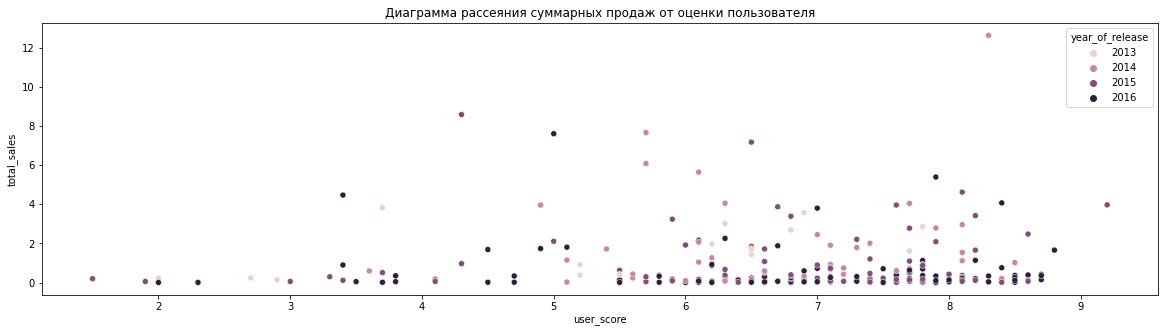

In [30]:
PS4_good_data = good_data.query('(platform == "PS4") & (user_score.notna())').sort_values(by='user_score')
plt.figure(figsize=(20, 5))
ax = sns.scatterplot(
    data=PS4_good_data,
    x = 'user_score',
    y= 'total_sales',
    hue = 'year_of_release',
    )
# ax.set(xlim = (1.5,9.5))
# ax.set(ylim = (0,5))
ax.set(title = 'Диаграмма рассеяния суммарных продаж от оценки пользователя')
plt.show()

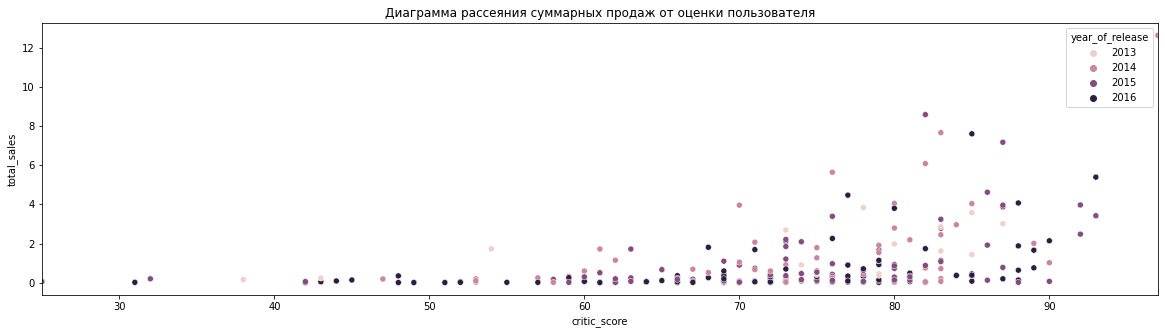

In [31]:
PS4_good_data = good_data.query('(platform == "PS4") & (critic_score.notna())').sort_values(by='critic_score')
plt.figure(figsize=(20, 5))
ax = sns.scatterplot(
    data=PS4_good_data,
    x = 'critic_score',
    y= 'total_sales',
    hue = 'year_of_release',
    )
ax.set(xlim = (25,97))
# ax.set(ylim = (0,5))
ax.set(title = 'Диаграмма рассеяния суммарных продаж от оценки пользователя')
plt.show()

In [32]:
print('коэффициент корреляции между суммарными продажами и рейтингом пользователей: {:.3f}'.format(PS4_good_data.corr()['user_score']['total_sales']))
print('коэффициент корреляции между суммарными продажами и рейтингом критиков: {:.3f}'.format(PS4_good_data.corr()['critic_score']['total_sales']))

коэффициент корреляции между суммарными продажами и рейтингом пользователей: -0.029
коэффициент корреляции между суммарными продажами и рейтингом критиков: 0.407


###### Комментарий
Как видно из графиков и коэффициентов корреляции связь между не сильная, хотя на диаграмме рассеняния для суммарных продаж прослеживается, что при росте оценки критиков, растут и продажи игры. Для оценок пользователей ситуация еще менее нагляднее. На мой взгляд, корреляция не такая сильная, как можно было предположить до анализа, так как данных для анализа не так много, за актуальный период для PS4 насчитывается всего 259 игр. У многих игр суммарные продажи близки к нулю, хотя рейтинг у игры высокий, это может быть связано с низкой стоимостью игры(Например: простые в производстве или старые игры, которые имеют малую цену, относительно новых, но хорошие рейтинги и большое кол-во покупок), а также с небольшой целевой аудитории игры(Например: головоломки не самый популярный жанр среди игр, но те, кто их любит способны оценить продукт по достоинству).

###### Сотнесите выводы с продажами игр на других платформах.

Проведем аналогичные расчеты для других платформ

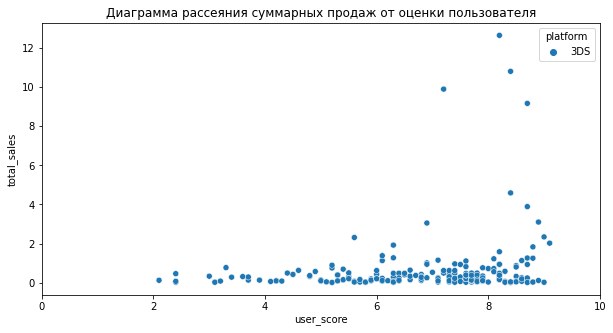

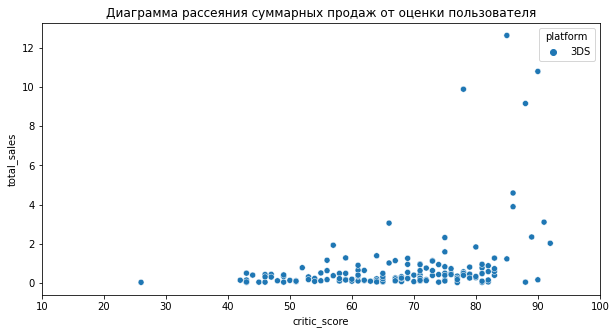

коэффициент корреляции между суммарными продажами и рейтингом пользователей: 0.201
коэффициент корреляции между суммарными продажами и рейтингом критиков: 0.344


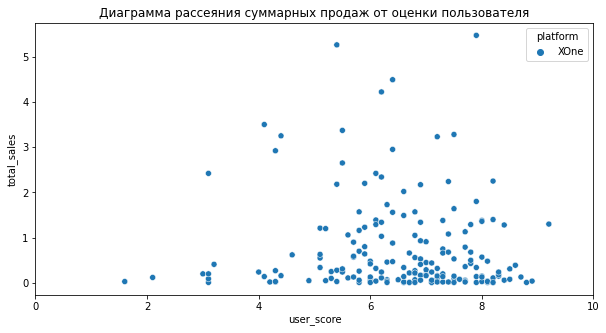

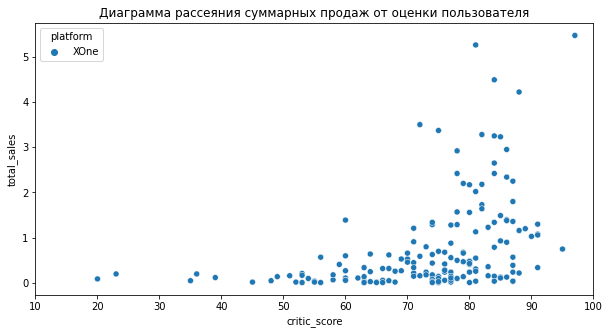

коэффициент корреляции между суммарными продажами и рейтингом пользователей: -0.071
коэффициент корреляции между суммарными продажами и рейтингом критиков: 0.414


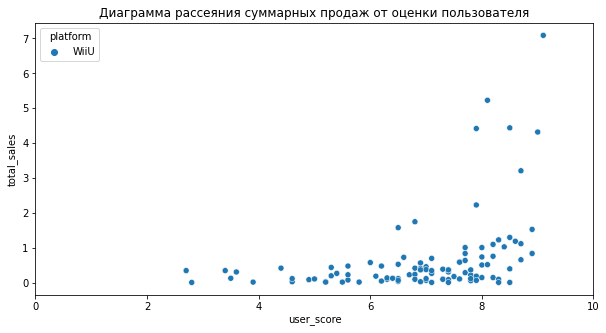

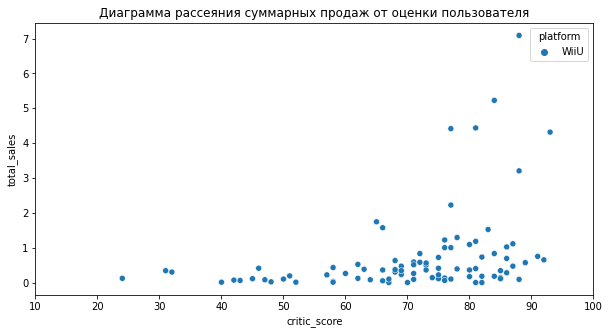

коэффициент корреляции между суммарными продажами и рейтингом пользователей: 0.398
коэффициент корреляции между суммарными продажами и рейтингом критиков: 0.351


In [33]:
for temp_platform in ['3DS','XOne','WiiU']:
    temp_good_data = good_data.query('(platform == @temp_platform) & (user_score.notna())').sort_values(by='critic_score')
    plt.figure(figsize=(10, 5))
    ax = sns.scatterplot(
        data=temp_good_data.query('(user_score.notna())').sort_values(by='user_score'),
        x = 'user_score',
        y= 'total_sales',
        hue = 'platform',
        )
    ax.set(xlim = (0,10))
    # ax.set(ylim = (0,5))
    ax.set(title = 'Диаграмма рассеяния суммарных продаж от оценки пользователя')
    plt.show()
    plt.figure(figsize=(10, 5))
    ax = sns.scatterplot(
        data=temp_good_data.query('(critic_score.notna())').sort_values(by='critic_score'),
        x = 'critic_score',
        y= 'total_sales',
        hue = 'platform',
        )
    ax.set(xlim = (10,100))
    # ax.set(ylim = (0,5))
    ax.set(title = 'Диаграмма рассеяния суммарных продаж от оценки пользователя')
    plt.show()
    print('коэффициент корреляции между суммарными продажами и рейтингом пользователей: {:.3f}'.format(temp_good_data.corr()['user_score']['total_sales']))
    print('коэффициент корреляции между суммарными продажами и рейтингом критиков: {:.3f}'.format(temp_good_data.corr()['critic_score']['total_sales']))

 ### Комментарий
 Как видно из диаграмм рассеяния и коэффициентов корреляции зав-ть продаж от оценок пользователей более сильная для платформы WiiU, что касается оценок критиков, то коэффициенты корреляции примерно равны, и диаграммы рассеяния имеют схожий вид.

###### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


Изучим жанры и выберем самые прибыльные

In [34]:
genre_good_data =  good_data.pivot_table(index='genre',values='total_sales', aggfunc=['mean','count'])
genre_good_data.columns=('total_sales','counts')
display(genre_good_data.head(5))

,total_sales,counts
genre,,
Action,0.438087,481
Adventure,0.170000,83
Fighting,0.634773,44
Misc,0.339739,115
Platform,1.010968,62


топ-5 наиболее выпускаемых жанров:


genre
Action          481
Role-Playing    160
Sports          118
Misc            115
Shooter          96
Name: counts, dtype: int64

топ-5 наименее выпускаемых жанров:


genre
Racing        53
Fighting      44
Simulation    42
Strategy      27
Puzzle        25
Name: counts, dtype: int64

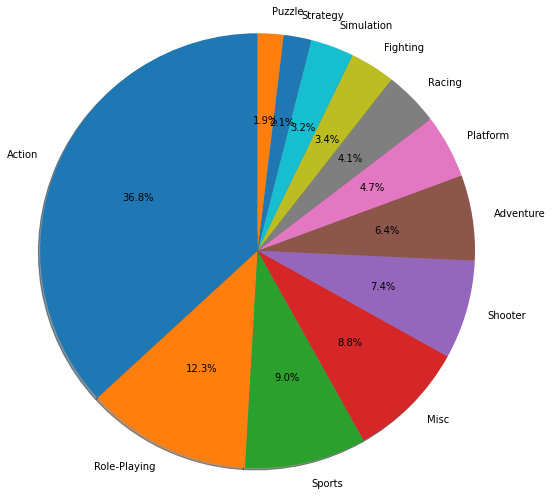

In [35]:
print('топ-5 наиболее выпускаемых жанров:')
display(genre_good_data['counts'].sort_values(ascending=False).head(5))
print('топ-5 наименее выпускаемых жанров:')
display(genre_good_data['counts'].sort_values(ascending=False).tail(5))

labels = genre_good_data.sort_values(by='counts',ascending=False).index
sizes = genre_good_data['counts'].sort_values(ascending=False)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,radius = 2.5)
plt.show()

топ-5 наиболее продаваемых жанров:


genre
Shooter         1.626979
Platform        1.010968
Racing          0.844528
Role-Playing    0.791625
Sports          0.776949
Name: total_sales, dtype: float64

топ-5 наименее продаваемых жанров:


genre
Action       0.438087
Misc         0.339739
Puzzle       0.276400
Adventure    0.170000
Strategy     0.161852
Name: total_sales, dtype: float64

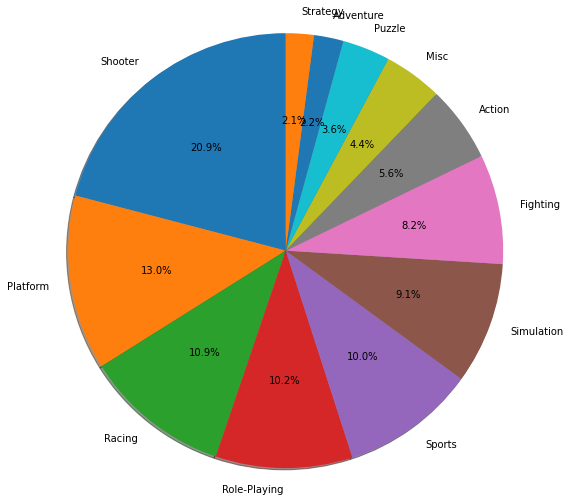

In [36]:
print('топ-5 наиболее продаваемых жанров:')
display(genre_good_data['total_sales'].sort_values(ascending=False).head(5))
print('топ-5 наименее продаваемых жанров:')
display(genre_good_data['total_sales'].sort_values(ascending=False).tail(5))

labels = genre_good_data.sort_values(by='total_sales',ascending=False).index
sizes = genre_good_data['total_sales'].sort_values(ascending=False)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,radius = 2.5)
plt.show()

###### Комментарий
Наиболее прибыльные жанры Shooter, Platform, Racing, Role-Playing
Наименее прибыльные жанры Strategy, Adventure, Puzzle, Misc

Наиболее выпускаемые жанры Action, Role-Playing, Sports, Misc, Shooter
Наименее выпускаемые жанры Racing, Fighting, Simulation, Strategy, Puzzle

Интересный факт, что не все наиболее продаваемые жанры являются наиболее выпускаемыми, хотя это можно связать и с кол-вом игр выпускаемых для платформ, например 3DS имеет больше всех игр относительно других платформ.

**Определите для пользователя каждого региона (NA, EU, JP):**
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Изучим популярные платформы для жителей разных регионов.

In [37]:
actual_data = data[data['year_of_release']>=2012]

,platform,na_sales,counts
7,Wii,0.562903,31
9,X360,0.520632,269
1,DS,0.417273,11
10,XOne,0.410220,227
4,PS4,0.369864,294
3,PS3,0.329236,314
0,3DS,0.320857,175
8,WiiU,0.312295,122
2,PC,0.169204,113
6,PSV,0.088016,126


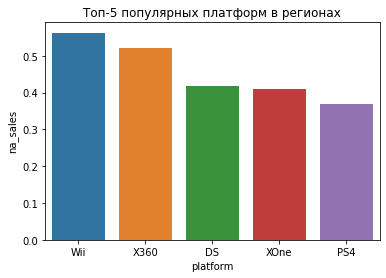

,platform,eu_sales,counts
4,PS4,0.486517,290
3,PS3,0.346948,308
9,X360,0.286615,260
7,Wii,0.277209,43
0,3DS,0.253550,169
10,XOne,0.236651,218
8,WiiU,0.201040,125
2,PC,0.154122,245
1,DS,0.147083,24
5,PSP,0.105000,4


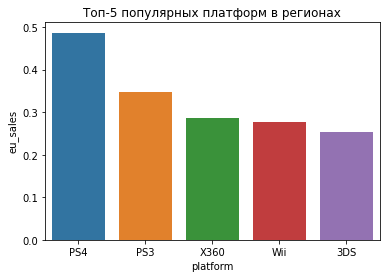

,platform,jp_sales,counts
1,DS,0.531429,7
6,Wii,0.339000,10
0,3DS,0.287059,306
7,WiiU,0.194179,67
2,PS3,0.104718,337
3,PS4,0.071570,223
4,PSP,0.061228,171
5,PSV,0.059633,354
8,X360,0.020933,75
9,XOne,0.015455,22


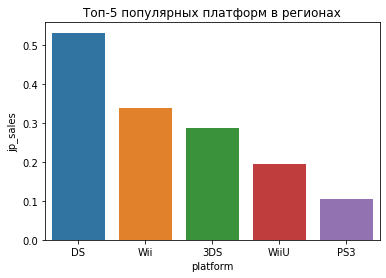

In [38]:
sales_regions = ['na_sales','eu_sales','jp_sales']
for region in sales_regions:
    temp_data_sales = actual_data[actual_data[region] > 0]
    temp_platforms = temp_data_sales.pivot_table(index='platform', values=region, aggfunc = ['mean','count'])
    temp_platforms.columns = (region,'counts')
    temp_platforms = temp_platforms.reset_index()
    display(temp_platforms.sort_values(by=region, ascending=False))
    
    ax = sns.barplot(
    data = temp_platforms.sort_values(by=region, ascending=False).head(5),
    x = 'platform',
    y = region)
    plt.title('Топ-5 популярных платформ в регионах')
    plt.show()
    

###### Комментарий
На графиках представлены самые популярные платформы(те у кого продажи больше)для каждого из регионов:
 - В Северной Америке популярны Wii и X360.
 - В Европе лидирует PS4.
 - В Японии с большим отрывом впереди DS.

Изучим популярные жанры для жителей разных регионов

,genre,na_sales,counts
8,Shooter,0.679859,213
10,Sports,0.447967,182
3,Misc,0.367212,104
4,Platform,0.338400,75
7,Role-Playing,0.327092,196
0,Action,0.301729,590
2,Fighting,0.260395,76
6,Racing,0.213580,81
9,Simulation,0.210750,40
11,Strategy,0.145862,29


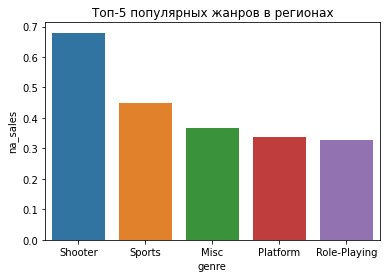

,genre,eu_sales,counts
8,Shooter,0.527860,215
10,Sports,0.342030,202
4,Platform,0.297361,72
9,Simulation,0.264545,55
6,Racing,0.262404,104
3,Misc,0.253077,104
0,Action,0.248103,643
7,Role-Playing,0.246599,197
2,Fighting,0.156377,69
11,Strategy,0.126098,41


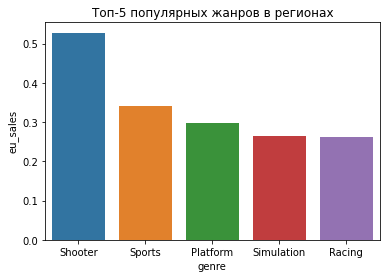

,genre,jp_sales,counts
9,Simulation,0.306176,34
4,Platform,0.261515,33
7,Role-Playing,0.217741,301
5,Puzzle,0.178333,12
3,Misc,0.119074,108
2,Fighting,0.118000,80
10,Sports,0.101646,79
8,Shooter,0.099247,93
11,Strategy,0.096000,30
0,Action,0.093783,563


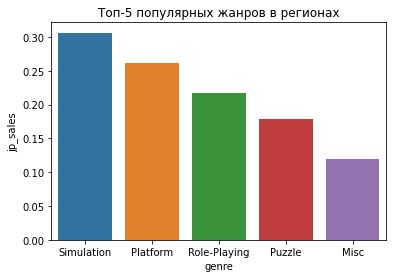

In [39]:
sales_regions = ['na_sales','eu_sales','jp_sales']
for region in sales_regions:
    temp_data_sales = actual_data[actual_data[region] > 0]
    temp_genres = temp_data_sales.pivot_table(index='genre', values=region, aggfunc = ['mean','count'])
    temp_genres.columns = (region,'counts')
    temp_genres = temp_genres.reset_index()
    display(temp_genres.sort_values(by=region, ascending=False))
    
    
    ax = sns.barplot(
    data = temp_genres.sort_values(by=region, ascending=False).head(5),
    x = 'genre',
    y = region)
    plt.title('Топ-5 популярных жанров в регионах')
    plt.show()

###### Комментарий
На графиках представлены самые популярные платформы(те у кого продажи больше)для каждого из регионов:
 - В Северной Америке и Европе вне конкуренции шутеры, затем игры спортивной тематики.
 - В Японии лидер имеет меньший отрыв - это симмуляторы, затем платформеры и РПГ.

Аналогично изучим рейтинг популярных игр в регионах

,rating,na_sales,counts
2,M,0.524906,479
0,E,0.347843,408
1,E10+,0.283433,268
3,T,0.231777,529


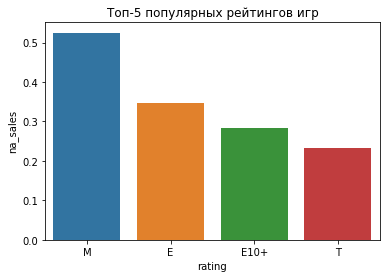

,rating,eu_sales,counts
2,M,0.436343,484
0,E,0.295918,490
1,E10+,0.197021,282
3,T,0.170842,558


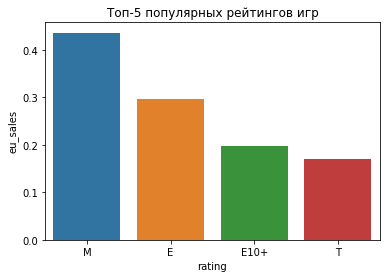

,rating,jp_sales,counts
3,T,0.135155,805
1,E10+,0.122239,67
0,E,0.116130,460
2,M,0.092875,240


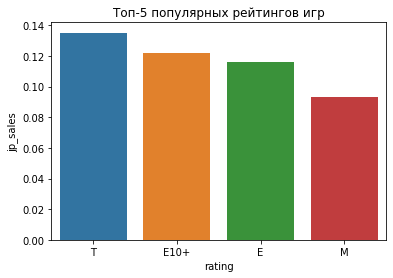

In [40]:
sales_regions = ['na_sales','eu_sales','jp_sales']
for region in sales_regions:
    temp_data_sales = actual_data[actual_data[region] > 0]
    temp_rating = temp_data_sales.pivot_table(index='rating', values=region, aggfunc = ['mean','count'])
    temp_rating .columns = (region,'counts')
    temp_rating  = temp_rating.reset_index()
    display(temp_rating.sort_values(by=region, ascending=False))
    
    
    ax = sns.barplot(
    data = temp_rating .sort_values(by=region, ascending=False).head(5),
    x = 'rating',
    y = region)
    plt.title('Топ-5 популярных рейтингов игр')
    plt.show()

###### Комментарий
- Распределение ретинга ESRB в Европе и Америке схоже самые продаваемые игры те, которые имеют рейтинг 17+, что логично, т.к. такой рейтинг обычно имеют шутеры, которые популярны в этих регионах
- Для японии рейтинг M(17+) по ESRB занимает наоборот последнее место, а лидирует T(13+), что может означать, что в среднем геймеры в этих странах моложе, чем в Европе и Америке, как и то что популярность шутеров не такая высокая, как в Еворпе и Америке.

### Вывод
 Итак, по полученным данным за актуальный период можно сделать обобщающий портрет по пользователю из каждого региона:
 - Северная Америка: Пользователь имеет платформу Wii или X360, предпочитает шутеры и спортивные игры, его возраст 17+(Что касается возраста, то это вопрос: насколько рейтинг ESRB влияет на пользователя при покупке игры и соответственно можно ли по нему адекватно оценить возраст пользователя, допустим, что можно:) )
 - Европа: Пользователь имеет платформу PS4, предпочитает шутеры и спортивные игры, его возраст 17+
 - Япония: Пользователь имеет платформу DS, предпочитает симмуляторы и платформеры, его возраст 13+

## Шаг 4. Проверьте гипотезы
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;**

Проверем гипотезы:
 - Нулевая гипотеза - средние обоих выборок равны между собой.
 - Альтернативная - средние обоих выборок  не равны между собой.
 
В качестве уровня значимости выберем 0.05. Для проверки гипотезы использовался t-критерий для двух независимых выборок. Параметр qual_var = False 

In [41]:
alpha = 0.05
XOne_mean_user_rating = data.query('(platform == "XOne") & (user_score.notna())')['user_score']
PC_mean_user_rating = data.query('(platform == "PC") & (user_score.notna())')['user_score']
results = st.ttest_ind(
    XOne_mean_user_rating, 
    PC_mean_user_rating)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3484854569444166e-05
Отвергаем нулевую гипотезу


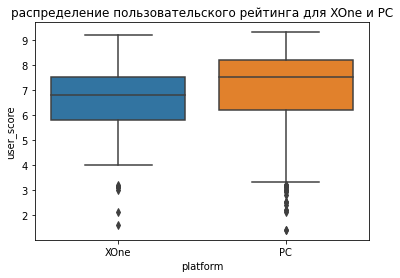

In [42]:
ax = sns.boxplot(data=pd.DataFrame({'XOne':XOne_mean_user_rating, 'PC':PC_mean_user_rating}))
plt.xlabel('platform')
plt.ylabel('user_score')
plt.title('распределение пользовательского рейтинга для XOne и PC')
plt.show()

### Вывод
При заданном уровне значимости нулевая гипотеза была отврегнута. Что вполне соответсвует гистограммам разамаха для пользовательских оценок XOne и PC. 

**Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.**

 - Нулевая гипотеза - средние обоих выборок равны между собой.
 - Альтернативная - средние обоих выборок  не равны между собой.

В качестве уровня значимости выберем 0.05. Для проверки гипотезы использовался t-критерий для двух независимых выборок.
    Параметр qual_var = False

In [43]:
alpha = 0.05
Action_mean_user_rating = data.query('(genre == "Action") & (user_score.notna())')['user_score']
Sports_mean_user_rating = data.query('(genre == "Sports") & (user_score.notna())')['user_score']
results = st.ttest_ind(
    Action_mean_user_rating, 
    Sports_mean_user_rating)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.07366020937399374
Не получилось отвергнуть нулевую гипотезу


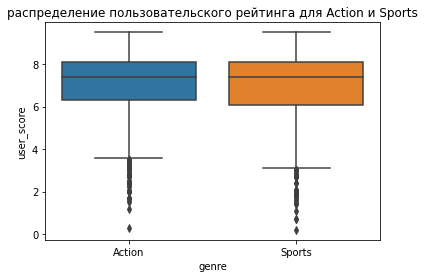

In [44]:
ax = sns.boxplot(data=pd.DataFrame({'Action':Action_mean_user_rating, 'Sports':Sports_mean_user_rating}))
plt.xlabel('genre')
plt.ylabel('user_score')
plt.title('распределение пользовательского рейтинга для Action и Sports')
plt.show()

### Вывод
При заданном уровне значимости нулевая гипотеза не может быть отврегнута. Что вполне соответсвует гистограммам разамаха для распределения пользовательских оценок для жанров Action и Sports.

## Общий вывод
В ходе выполения работы были решены все поставленные задачи к ним были написаны выводы или комментарии. Используя данные 5-летнего актульного периода, были получены потенциально прибыльные платформы и жанры для каждого региона, следовательно был определен портрет пользователя из каждого региона, следовательно для максимальной успешности игры в регионе необходимо учесть данный портрет при рекламе игр в этих регионах. Например для Европы  скорее всего будет прибыльна игра выпущенная на PS4 в жанре шутер, хорошие отзывы критиков могут благотворно повлиять на продажи этой игры, аудитория на котрую расчитана игра скорее 17+. Аналогичные рассуждения можно провести и для 2 других реигонов.

В исходных данных присутствовало большое кол-во пропусков, которое было решено не заполнять, т.к. их заполнение могло исказить результаты и внести ошибки в анализ.